In [59]:
# importing the necessary Python libraries

import regex

import pandas as pd

import numpy as np

import emoji

from collections import Counter

import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
#Preparing the Data using Python function before Importing it

def date_time(s):

    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False
    
def getDatapoint(line):
    
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
        
    else:
        author= None
    return date, time, author, message

In [9]:
#Importing the Data Set - Whatsapp Chat

data = []

conversation = 'C:/Users/TAMMY/Desktop/PROJECT/Python\WhatsApp Chat with Arnold Pollyn.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    
    while True:
        line = fp.readline()
        if not line:
            break
            
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
            
        else:
            messageBuffer.append(line)

In [35]:
#Displaying the first 20 conversation in the Data set - WhatsApp chat

import warnings
warnings.filterwarnings('ignore')

df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])

print(df.tail(20))
print(df.info())
print(df.Author.unique())

          Date      Time              Author  \
111 2022-09-14  11:54 pm    Ⱨ   ₳  Ɽ   ₮  😕😕   
112 2022-09-14  11:56 pm  Arnold Pollyn ✌🏽✌🏽   
113 2022-09-14  11:56 pm  Arnold Pollyn ✌🏽✌🏽   
114 2022-09-14  11:57 pm    Ⱨ   ₳  Ɽ   ₮  😕😕   
115 2022-09-14  11:57 pm    Ⱨ   ₳  Ɽ   ₮  😕😕   
116 2022-09-15  12:02 am  Arnold Pollyn ✌🏽✌🏽   
117 2022-09-15  12:03 am    Ⱨ   ₳  Ɽ   ₮  😕😕   
118 2022-09-15  12:03 am    Ⱨ   ₳  Ɽ   ₮  😕😕   
119 2022-09-15  12:03 am  Arnold Pollyn ✌🏽✌🏽   
120 2022-02-10  12:13 pm  Arnold Pollyn ✌🏽✌🏽   
121 2022-02-10   1:33 pm    Ⱨ   ₳  Ɽ   ₮  😕😕   
122 2022-02-10   1:33 pm    Ⱨ   ₳  Ɽ   ₮  😕😕   
123 2022-02-10   1:33 pm    Ⱨ   ₳  Ɽ   ₮  😕😕   
124 2022-02-10   9:32 pm  Arnold Pollyn ✌🏽✌🏽   
125 2022-02-10   9:32 pm  Arnold Pollyn ✌🏽✌🏽   
126 2022-02-10   9:43 pm    Ⱨ   ₳  Ɽ   ₮  😕😕   
127 2022-02-10   9:44 pm  Arnold Pollyn ✌🏽✌🏽   
128 2022-02-10   9:44 pm    Ⱨ   ₳  Ɽ   ₮  😕😕   
129 2022-02-10   9:45 pm                None   
130 2022-02-10  10:15 pm  Arnold Pollyn 

In [11]:
#Displaying the toal number of messages in the Data Set - whatsapp Chat

total_messages = df.shape[0]
print(total_messages)

131


In [12]:
#Displaying th total number media messages in the Data Set - Whatsapp Chat

media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

7


In [54]:
#Displaying the Total Number of Emojis Present in the Data Set - Whatsapp Chat

def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        
        if any(char in emoji.EMOJI_DATA for char in word):
            emoji_list.append(word)
    return emoji_list

df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
print(emojis)

5


In [17]:
#Displaying the Total Chat Analysis present in the Data Set - Whatsapp Chat

URLPATTERN = r'(https?://\S+)'

df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between Hart and Arnold")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emojis)
print("Number of Links Shared", links)

Chats between Hart and Arnold
Total Messages:  131
Number of Media Shared:  7
Number of Emojis Shared 0
Number of Links Shared 1


In [73]:
#Graphical Representation of the most Emojis used in the Data Set - WhatsApp Chat

total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)
emojis = sum(req_df['emoji'].str.len())

total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)
  
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

('😹', 2)
('😕', 2)
('✌🏽', 1)


There are 3503 words in all the messages.


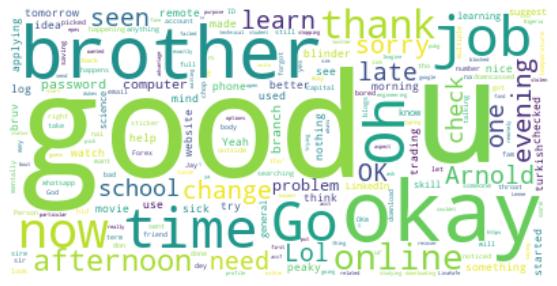

In [74]:
#Total number of words present and its Graphical Representation in the Data Set - WhatsApp Chat

text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:

plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()